# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [75]:
#create url for query with imperial units and city at the end
#url from https://openweathermap.org/appid
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key = weather_api_key

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

In [76]:
# Loop through the list of cities and perform a request for data on each

print('Beginning Data Retrieval')     
print('-----------------------------')
i=0 

for city in cities:
    #print(f"query_url is : {query_url}")
    response = requests.get(query_url + city).json()
    #print(f"response is : {response}")
    cod = response['cod']
    if cod == 200: 
        i = i + 1
        City.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        print(f'Processing Record {i} of Set 1 | {city}')
    else:
        print(f'City not found. Skipping...')
    
print(f'-----------------------------')
print(f'Data Retrieval Complete     ')
print(f'-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | doume
Processing Record 2 of Set 1 | chokurdakh
Processing Record 3 of Set 1 | eureka
Processing Record 4 of Set 1 | ketchikan
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | kavieng
Processing Record 7 of Set 1 | tha chang
Processing Record 8 of Set 1 | bataipora
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | inuvik
Processing Record 12 of Set 1 | thompson
City not found. Skipping...
Processing Record 13 of Set 1 | castro
City not found. Skipping...
City not found. Skipping...
Processing Record 14 of Set 1 | alice springs
Processing Record 15 of Set 1 | lata
Processing Record 16 of Set 1 | hokitika
Processing Record 17 of Set 1 | tekeli
Processing Record 18 of Set 1 | westport
Processing Record 19 of Set 1 | dikson
Processing Record 20 of Set 1 | sorland
Processing Record 21 of Set 1 | saint anthony
Processing R

Processing Record 189 of Set 1 | caravelas
Processing Record 190 of Set 1 | la libertad
Processing Record 191 of Set 1 | bredasdorp
Processing Record 192 of Set 1 | ust-ishim
Processing Record 193 of Set 1 | tarsus
City not found. Skipping...
Processing Record 194 of Set 1 | dosso
Processing Record 195 of Set 1 | saldanha
Processing Record 196 of Set 1 | luderitz
Processing Record 197 of Set 1 | moron
Processing Record 198 of Set 1 | nyurba
Processing Record 199 of Set 1 | pevek
Processing Record 200 of Set 1 | mount isa
Processing Record 201 of Set 1 | balkanabat
Processing Record 202 of Set 1 | astana
Processing Record 203 of Set 1 | palmer
Processing Record 204 of Set 1 | yumen
Processing Record 205 of Set 1 | de aar
Processing Record 206 of Set 1 | narsaq
Processing Record 207 of Set 1 | clyde river
Processing Record 208 of Set 1 | victoria
Processing Record 209 of Set 1 | narasannapeta
Processing Record 210 of Set 1 | bay roberts
City not found. Skipping...
Processing Record 211 o

Processing Record 373 of Set 1 | heihe
Processing Record 374 of Set 1 | maldonado
Processing Record 375 of Set 1 | reinosa
Processing Record 376 of Set 1 | yerbogachen
Processing Record 377 of Set 1 | gympie
Processing Record 378 of Set 1 | atlantic city
Processing Record 379 of Set 1 | mehamn
Processing Record 380 of Set 1 | san cristobal
Processing Record 381 of Set 1 | christchurch
Processing Record 382 of Set 1 | mayo
Processing Record 383 of Set 1 | kuching
Processing Record 384 of Set 1 | vila
Processing Record 385 of Set 1 | tuatapere
Processing Record 386 of Set 1 | samarai
Processing Record 387 of Set 1 | port lincoln
Processing Record 388 of Set 1 | san quintin
Processing Record 389 of Set 1 | jinan
Processing Record 390 of Set 1 | usinsk
Processing Record 391 of Set 1 | puerto escondido
Processing Record 392 of Set 1 | mildura
Processing Record 393 of Set 1 | korla
Processing Record 394 of Set 1 | vila franca do campo
Processing Record 395 of Set 1 | mutis
Processing Record 

Processing Record 556 of Set 1 | quelimane
Processing Record 557 of Set 1 | muroto
Processing Record 558 of Set 1 | kaduqli
City not found. Skipping...
Processing Record 559 of Set 1 | vostok
Processing Record 560 of Set 1 | kolosovka
City not found. Skipping...
Processing Record 561 of Set 1 | bozoum
-----------------------------
Data Retrieval Complete     
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [78]:
# create a data frame from retreived weather data
weather_dict = {
    "City": City,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date": Date,
    "Humidity": Humidity,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": Max_Temp,
    "Wind Speed": Wind_Speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv('WeatherPy_data.csv')

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Doumé,55,CM,1647162887,46,4.2333,13.4500,30.68,1.57
1,Chokurdakh,100,RU,1647162888,94,70.6333,147.9167,-24.43,2.25
2,Eureka,44,US,1647162888,80,40.8021,-124.1637,9.40,0.89
3,Ketchikan,20,US,1647162888,100,55.3422,-131.6461,2.99,2.57
4,Rikitea,6,PF,1647163141,75,-23.1203,-134.9692,25.85,6.17


In [79]:
#Export the city data into a .csv.

# Save csv file
weather_data.to_csv("Weather_Data.csv", index=False)
weather_data.count()

City          561
Cloudiness    561
Country       561
Date          561
Humidity      561
Lat           561
Lng           561
Max Temp      561
Wind Speed    561
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [80]:
# Save csv file
weather_data.describe()



,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,561.000000,5.610000e+02,561.000000,561.000000,561.000000,561.000000,561.000000
mean,59.825312,1.647163e+09,71.434938,21.089546,16.428501,11.723209,3.707487
std,40.412579,1.362979e+02,22.690380,33.169613,90.638257,16.121849,2.756972
min,0.000000,1.647163e+09,1.000000,-54.800000,-175.200000,-33.870000,0.000000
25%,14.000000,1.647163e+09,59.000000,-4.776100,-60.771800,0.600000,1.650000
50%,75.000000,1.647163e+09,77.000000,28.366700,21.805400,14.890000,3.080000
75%,100.000000,1.647163e+09,88.000000,48.005600,95.321400,25.050000,4.920000
max,100.000000,1.647163e+09,100.000000,78.218600,179.316700,36.910000,18.540000


In [81]:
#  Get the indices of cities that have humidity over 100%.
humid_city_data = weather_data[(weather_data["Humidity"] > 100)].index
                                  
humid_city_data

Int64Index([], dtype='int64')

In [82]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.drop(humid_city_data, inplace=False)
clean_city_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Doumé,55,CM,1647162887,46,4.2333,13.4500,30.68,1.57
1,Chokurdakh,100,RU,1647162888,94,70.6333,147.9167,-24.43,2.25
2,Eureka,44,US,1647162888,80,40.8021,-124.1637,9.40,0.89
3,Ketchikan,20,US,1647162888,100,55.3422,-131.6461,2.99,2.57
4,Rikitea,6,PF,1647163141,75,-23.1203,-134.9692,25.85,6.17


In [83]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

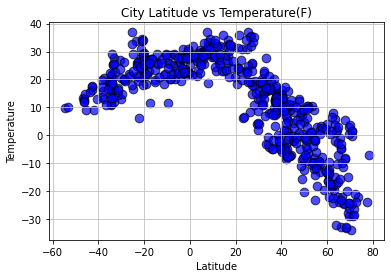

In [91]:
plt.figure(figsize = (6, 4))
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], s=75, c="blue", edgecolors='k', alpha=0.7)
plt.grid(color="0.75", linestyle="-")
plt.title("City Latitude vs Temperature(F)")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

#save the plot
plt.savefig('lat_v_temp.png')
plt.show()

## Latitude vs. Humidity Plot

C:\Users\micha\AppData\Local\Temp/ipykernel_22948/361384830.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


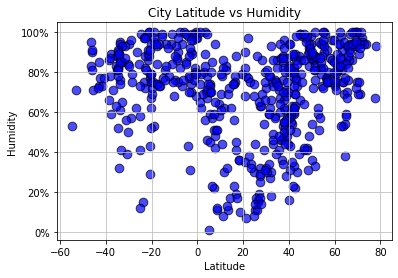

In [92]:
#build a scatter plot based on the columns Latitude and humidity
plt.figure(figsize = (6,4))
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], s=75, c="blue", edgecolors='k', alpha=0.7)
plt.grid(color="0.75", linestyle="-")
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()]) 

#save the plot
plt.savefig('lat_v_hum.png')
plt.show()

## Latitude vs. Cloudiness Plot

C:\Users\micha\AppData\Local\Temp/ipykernel_22948/1299176169.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


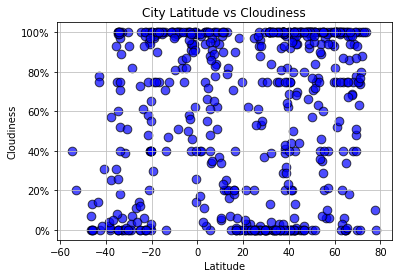

In [93]:
plt.figure(figsize = (6, 4))
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], s=75, c="blue", edgecolors='k', alpha=0.7)
plt.grid(color="0.75", linestyle="-")
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])

#save the plot
plt.savefig('lat_v_cloud.png')
plt.show()

## Latitude vs. Wind Speed Plot

C:\Users\micha\AppData\Local\Temp/ipykernel_22948/3584665680.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


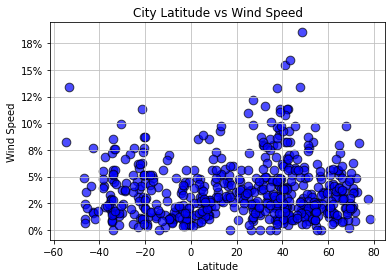

In [94]:
plt.figure(figsize = (6, 4))
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], s=75, c="blue", edgecolors='k', alpha=0.7)
plt.grid(color="0.75", linestyle="-")
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])

#save the plot
plt.savefig('lat_v_wind.png')
plt.show()

## Linear Regression

In [95]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [96]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = weather_data.loc[(weather_data["Lat"] >= 0)]
southern_hemi_df = weather_data.loc[(weather_data["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7495690314455717


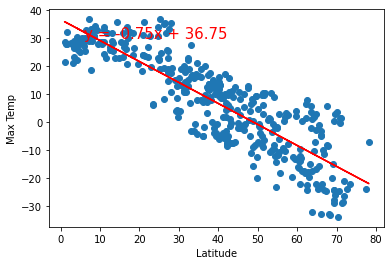

In [97]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3190459524918197


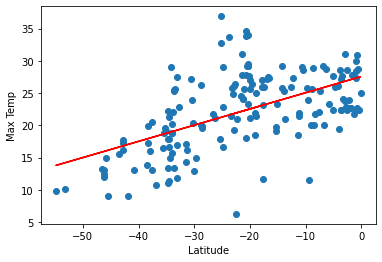

In [98]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.18407983253717247


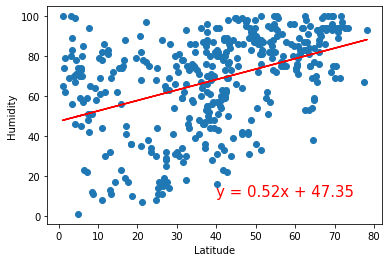

In [99]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.036469863227530486


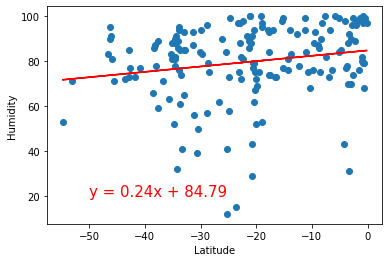

In [100]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.029600934611500457


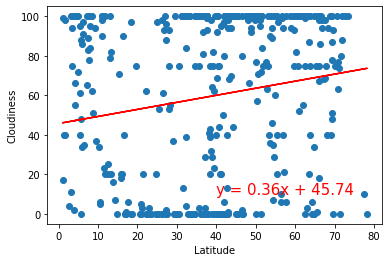

In [101]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.25291601398938085


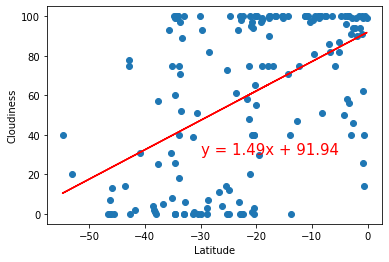

In [102]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0012495033424728278


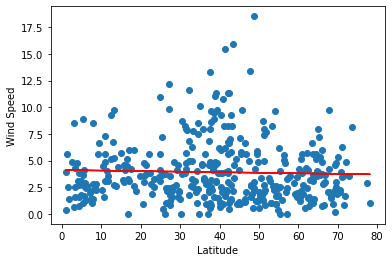

In [103]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07691569701063786


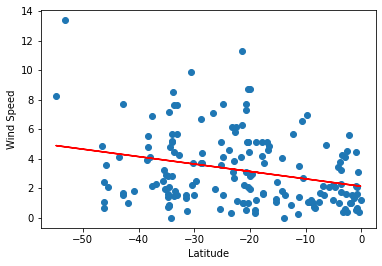

In [104]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))